# **Ocean Mixing Story Group 1**

## Background 

This project aims to better understand the statistical significance of reconstructing global pCO₂ fields using ML trained on sparse data. It extends upon the analysis carried out by **Gloege et al. (2021)** *"Quantifying Errors in Observationally Based Estimates of Ocean Carbon Sink Variability."* and the method of **Bennington et al. (2022)** *"Explicit Physical Knowledge in Machine Learning for Ocean Carbon Flux Reconstruction: The pCO2-Residual Method"* by introducing a new ML method, NGBoost, which gives a probablistic prediction instead of XGBoost's point prediction. By introducting probablistic information, including standard deviations, scientists can understand the statistical confidence of models and how that confidence changes with the introduction of additional data. 

Oceans have absorbed 38% of all anthropogenic fossil fuel emissions over the industrial era. Yet, the scientific communitity is uncertain whether oceans will continue to absorb the same amount of carbon. Accurate estimations of air–sea CO₂ flux are critical for understanding the current and future global carbon budget, but are challenging due to the sparse and unevenly distributed nature of surface ocean pCO₂ observations. 

Probablistic predictions provide additional understanding of current models based on this sparse and uneven observations versus point-based predictions. By better discerning confidence in pCO2 reconstructions, scientists can more accurately convey recommendations based on the models, such as more accurately answer questions related to carbon budgets and other scientific and socio-economic questions related to climate change. Additionally, this research can inform scientific funding, helping to answer whether more real-world pCO₂ observations are needed for more accurate models.   

## Goals 

This analysis has two goals:
1. Determine the **statistical confidence and variability** of the pCO₂ reconstructions across the globe
2. Investigate how **adding more observations** affects statistical confidence and variability

Results from this investigation will help answer where there is more variation in the data and likewise where there is greater confidence in the pCO₂ reconstructions.

Furthermore, this analysis will help answer the degree to which adding data will improve the confidence of reconstruction models generally. Going a step deeper, this investigation can give insight into whether it is more important to add more observations in locations historically sampled, or in locations not in the database. Relatedly, this research can inform which areas of the globe are most important to direct funding towards sampling, or to focus other statistical technique to improve model confidence. 

## ML model 

Both NGBoost and XGBoost are gradient boosting algorithms. NGBoost is a gradient boosting algorithm that focuses on probabilistic predictions and uncertainty estimation, while XGBoost is a general-purpose gradient boosting algorithm known for its accuracy and efficiency.

The NGBoost method is more resource intensive than XGBoost. As such, this analysis focuses on one ESM model and 3 members.

# NGBoost vs XGBoost: A Comparison of Two Gradient Boosting Methods

## Introduction

**Gradient Boosting** is one of the most powerful machine learning techniques for structured/tabular data. **XGBoost** is a well-known implementation focused on high performance and scalability, while **NGBoost (Natural Gradient Boosting)** introduces a novel twist: it provides **probabilistic predictions with uncertainty estimates**.

This document compares the two in terms of capability, use cases, and implementation.

---

## Overview Comparison

| Feature | NGBoost | XGBoost |
|--------|---------|---------|
| Output | Probabilistic (distributions) | Point estimate (single value) |
| Uncertainty Estimation | ✅ Yes (explicit) | ❌ No (requires external methods) |
| Based on Gradient Boosting | ✅ Yes | ✅ Yes |
| Base Learner | Decision Trees (default) | Decision Trees (default) |
| Target Use | Regression with uncertainty, risk-sensitive decisions | General-purpose regression/classification |
| Key Innovation | Natural Gradient for distribution parameter learning | Regularized, efficient gradient boosting |
| Open Source Repo | [NGBoost GitHub](https://github.com/stanfordmlgroup/ngboost) | [XGBoost GitHub](https://github.com/dmlc/xgboost) |

---

## Point Prediction vs Probabilistic Prediction

| Question | XGBoost Output | NGBoost Output |
|---------|----------------|----------------|
| What’s the temperature at noon tomorrow? | 73.4°F | 𝑁(73.4, 1.5²) |
| How long will this patient live? | 11.3 months | Gamma(α=2.3, β=5.2) |

In many real-world applications, having an estimate of **how uncertain** a prediction is can be more valuable than the prediction itself.

---

## Modular Design of NGBoost

NGBoost is designed with three modular components:

1. **Base Learner**: Usually decision trees, but customizable.
2. **Distribution**: e.g. Normal, Exponential, Poisson – depends on target type.
3. **Scoring Rule**: LogScore (maximum likelihood), CRPS, etc.

---

## Core Algorithm Difference

### XGBoost
- Minimizes a custom loss (e.g. MSE, LogLoss)
- Adds weak learners to correct residuals
- Outputs a **single point prediction**

### NGBoost
- Models the **entire predictive distribution**
- Learns parameters (e.g. mean, std) using **natural gradients**
- Outputs a **full probability distribution**

---

## Code Example: XGBoost (Regression)

```python
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
```
## Code Example: NGBoost (Probabilistic Regression)
```python
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import LogScore
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ngb = NGBRegressor(Dist=Normal, Score=LogScore)
ngb.fit(X_train, y_train)

# Predict mean of distribution
y_pred = ngb.predict(X_test)

# Predict full distribution
y_dists = ngb.pred_dist(X_test)
means = y_dists.loc  # mean
stds = y_dists.scale  # std deviation


## Adding Observations

In section 2, there is an investigation of how adding data to the model affects statistical confidence and variability. In particular, we investigate adding data across 2 dimensions:

1. Adding more observations at locations that have historically been sampled. 
2. Adding new locations, not previously sampled for pCO2 concentrations.

In both methods, we investigate increasing sampling by 14%, 30%, and 50% compared to current observations. In 1., this research adds more observations to locations that have historically been sampled. In 2., this research focuses on adding new locations in 3 undersampled Ocean Basins: Southern Ocean, Indian Ocean, and Pacific Ocean between Australia and South America. (Arctic areas were not added given the lack of coverage in ESMs).   

## Key Findings

TO BE FILLED OUT

## Structure:

0. Setup
1. Understanding Surface pCO₂ Sampling
2. Training NGBoost Model
3. Stastistical Analysis of pCO₂ Reconstructions
4. Testing Additional Members
5. Conclusion

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
your_username = 'azamkhan99'  # username of the person running the code. Reviewers should also change this to their own username.

#To allow the reviewer to access the saved files, provide notebook owner's username here:  
owner_username = 'azamkhan99'  # Reviewer should not change this name

# 0. Setup Workspace and Import Packages


In [14]:
%%capture
!pip install tensorflow
!pip install keras
!pip install --upgrade ngboost

In [15]:
%%capture
### standard imports ###
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
### Python file with supporting functions ###
# standard imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
# Redirect all low-level stderr output
sys.stderr = open(os.devnull, 'w')

import datetime
from collections import defaultdict
import random
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',100)
import csv
import cmocean as cm

# machine learning libraries
import xgboost as xgb     
from xgboost import XGBRegressor

from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import LogScore

# Change to the parent directory of the current working directory. (Run only once—otherwise it will keep moving up the directory tree)
os.chdir(os.path.dirname(os.getcwd()))
print("Current working directory:", os.getcwd())

# Python file with supporting functions
import lib.residual_utils as supporting_functions
from lib.visualization import *
from lib.bias_figure2 import concat_datasets, XarrayEvaluator
from lib.corr_figure3 import eval_spatial
import lib.functions as func
import lib.group1_utils as g1u

In [16]:
from lib.config import (
    SOCAT_PATH,
    PATH_SEEDS,
    GRID_SEARCH_APPROACH,
    MLINPUTS_PATH,
    ENSEMBLE_DIR,
    FEATURES_SEL,
    TARGET_SEL,
)

In [17]:
### Setting the date range to unify the date type ###

# Define date range
date_range_start = '2004-01-01T00:00:00.000000000'
date_range_end = '2023-12-31T00:00:00.000000000'

# create date vector, adds 14 days to start & end
dates = pd.date_range(start=date_range_start, 
                      end=date_range_end,freq='MS')


init_date = str(dates[0].year) + format(dates[0].month,'02d')
fin_date = str(dates[-1].year) + format(dates[-1].month,'02d')

# 1. Surface ocean pCO2: A sparse data challenge

Analyze stastical metrics of real-world & theoretical sampling of pCO₂

## 1.1
### 🔹 Original Mask

- **`socat_mask_data`**  
  The baseline SOCAT sampling mask, showing where and when surface ocean pCO₂ has been measured.

---

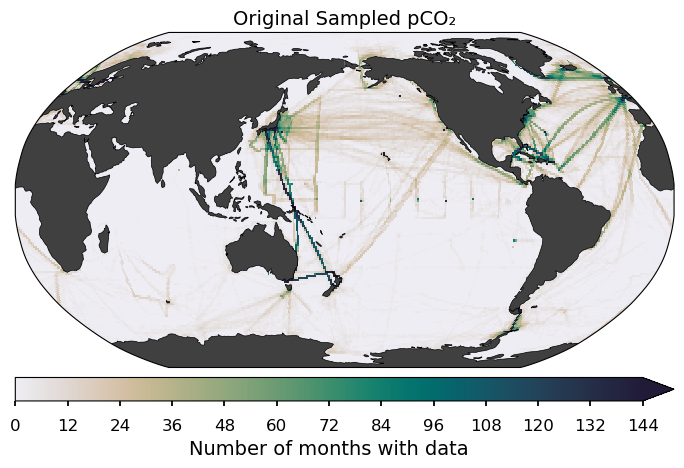

In [18]:
socat_mask_data = xr.open_zarr(SOCAT_PATH).sel(time=slice(str(dates[0]),str(dates[-1])))

non_zero_counts = (socat_mask_data.socat_mask != 0).sum(dim="time")
plot_style = "seaborn-v0_8-talk"

plot_mask(non_zero_counts, "Original Sampled pCO₂")

Here, we visualize all SOCAT data for the period selected for this analysis (default is 2004-2023) at each 1 degree X 1 degree location (100x100km at the equator). 

Data is sparse, with only around 2% of the globe sampled. The majority of the sampling is in the northern hemisphere

## 1.2
## Adding More Locations

This notebook investigates how different sampling strategies affect the statistical confidence of pCO₂ reconstructions.  

In both methods, we investigate samples increases of 14%, 30%, and 50%. "Augmenting existing locations" looks at adding more data to locations that have already been sampled historically, while "adding new locations" only looks to add data in places that have not historically been sampled. 

Given the methodology, both methods tend to add data outside of typical shipping routes, especially in the Southern Hemisphere. The "adding new locations" is more concentrated in the additions, while the new data in "augmenting existing" is more dispersed. 

---

### 1.2.1
### 🔸 Augmenting Existing Sampled Locations

These variants **increase the number of samples at already-sampled locations** without changing the spatial coverage.

- **`socat_mean_glob`**  
  Boosts under-sampled locations (below global mean) to the global mean number of sampling months (14% increase).

- **`socat_30p_glob`**  
  Ensures all existing sampled grid cells have at least 7 months of data (≈30% increase).

- **`socat_50p_glob`**  
  Ensures all existing sampled grid cells have at least 10 months of data (≈50% increase).

---

In [19]:
#Add more sampling to areas with low historical sampling
mean_val_glob_loc, socat_mean_glob, thirtyp_val_glob, socat_30p_glob, fiftyp_val_glob, socat_50p_glob = func.add_to_existing(non_zero_counts, socat_mask_data)

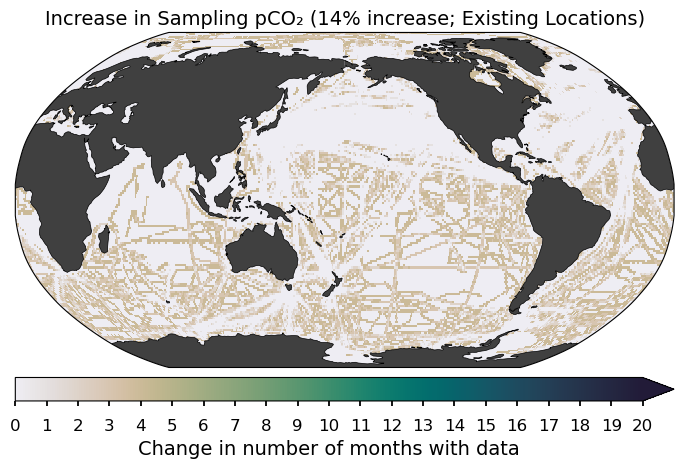

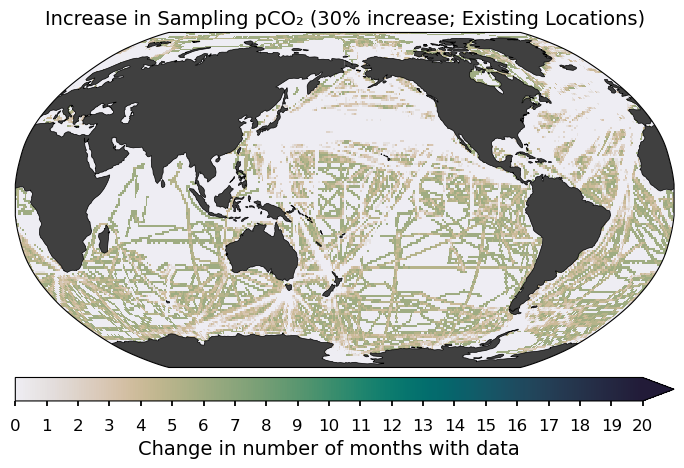

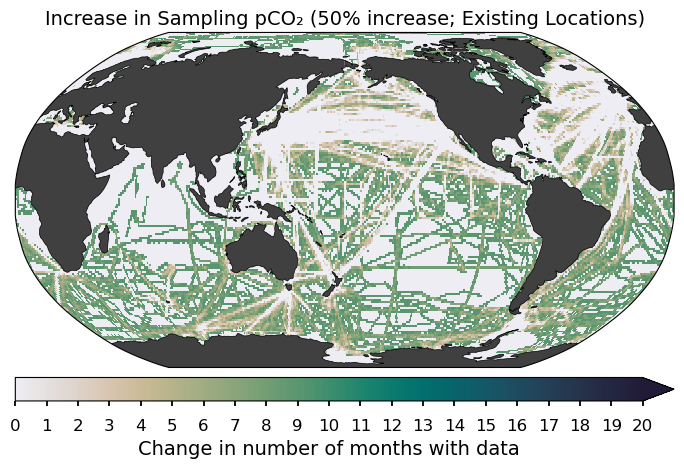

In [20]:
##WRITE DIFFERENT LABEL FOR CHANGE IN NUMBER OF MONTHS)
diff_mean = mean_val_glob_loc - non_zero_counts
diff_30p  = thirtyp_val_glob  - non_zero_counts
diff_50p  = fiftyp_val_glob   - non_zero_counts

#visualize increase in sampling
plot_maskd(diff_mean, "Increase in Sampling pCO₂ (14% increase; Existing Locations)",vrange=[0,20,1])
plot_maskd(diff_30p, "Increase in Sampling pCO₂ (30% increase; Existing Locations)",vrange=[0,20,1])
plot_maskd(diff_50p, "Increase in Sampling pCO₂ (50% increase; Existing Locations)",vrange=[0,20,1])

### 1.2.2
### 🔸 Adding New Sample Locations

These variants **expand the spatial footprint** by adding sampling at new locations in undersampled ocean regions.

- **`addmeanp_socat`**  
  Adds ~14% new grid points in each of the three undersampled basins, sampled at the global mean frequency.

- **`add30p_socat`**  
  Adds 100 new grid points per basin, each with moderate sampling (~7 months).

- **`add50p_socat`**  
  Adds 200 new grid points per basin, each with higher sampling (~10 months).

---

<table style="border-collapse: collapse; width: 100%;">
  <tr>
    <th style="border: 1px solid black;">Region</th>
    <th style="border: 1px solid black;">Latitude Range</th>
    <th style="border: 1px solid black;">Longitude Range</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 1</td>
    <td style="border: 1px solid black;">-46 to -36</td>
    <td style="border: 1px solid black;">-97 to -87</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 2</td>
    <td style="border: 1px solid black;">-45 to -35</td>
    <td style="border: 1px solid black;">-130 to -110</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 3</td>
    <td style="border: 1px solid black;">-32 to -27</td>
    <td style="border: 1px solid black;">-141 to -121</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Southern Ocean</td>
    <td style="border: 1px solid black;">-76 to -67</td>
    <td style="border: 1px solid black;">-60 to -40</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Indian Ocean 1</td>
    <td style="border: 1px solid black;">-11 to 9</td>
    <td style="border: 1px solid black;">75 to 85</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Indian Ocean 2</td>
    <td style="border: 1px solid black;">-30 to -25</td>
    <td style="border: 1px solid black;">70 to 90</td>
  </tr>
</table>

In [21]:
addmeanp_oceans, addmeanp_socat, add30p_oceans, add30p_socat, \
    add50p_oceans, add50p_socat = func.add_new(non_zero_counts, socat_mask_data)


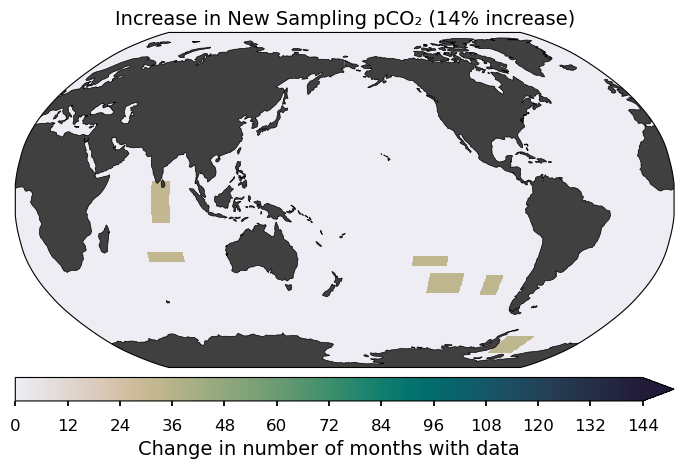

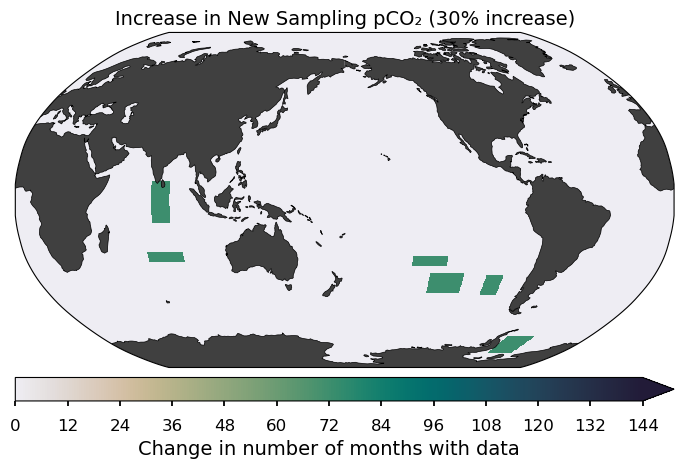

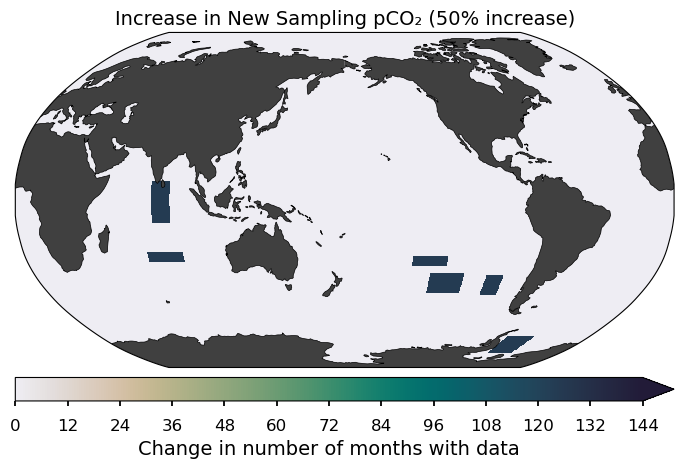

In [22]:
diff_mean_n = addmeanp_oceans - non_zero_counts
diff_30p_n  = add30p_oceans  - non_zero_counts
diff_50p_n  = add50p_oceans   - non_zero_counts

#visualize increase in sampling
plot_maskd(diff_mean_n, "Increase in New Sampling pCO₂ (14% increase)")
plot_maskd(diff_30p_n, "Increase in New Sampling pCO₂ (30% increase)")
plot_maskd(diff_50p_n, "Increase in New Sampling pCO₂ (50% increase)")

In [23]:
mask_data_dict = {
    "baseline": socat_mask_data,
    "densify_mean_pattern": socat_mean_glob,
    "densify_30p": socat_30p_glob,
    "densify_50p": socat_50p_glob,
    "expand_14p": addmeanp_socat,
    "expand_30p": add30p_socat,
    "expand_50p": add50p_socat,
}

In [24]:
non_zero_dict = {
    "baseline" : non_zero_counts,
    "densify_mean_pattern": mean_val_glob_loc,
    "densify_30p": thirtyp_val_glob,
    "densify_50p": fiftyp_val_glob,
    "expand_14p": addmeanp_oceans,
    "expand_30p": add30p_oceans,
    "expand_50p": add50p_oceans
}

# 2. NGBoost Model Training

### 2.1 Training with NGBoost on observations

In [25]:
### train-validate-test split proportions ###

select_dates = []
test_dates = []

for i in range(0, len(dates)):
    if i % 5 != 0:
        select_dates.append(dates[i])  ### 80% train days set ###
    if i % 5 == 0:
        test_dates.append(dates[i])  ### 20% test days set ###

### Then, the month numbers above are converted back to their respective datetime objects.

year_mon = []

for i in range(0, len(select_dates)):
    tmp = select_dates[i]
    year_mon.append(f"{tmp.year}-{tmp.month}")

test_year_mon = []

for i in range(0, len(test_dates)):
    tmp = test_dates[i]
    test_year_mon.append(f"{tmp.year}-{tmp.month}")


In [26]:
features_sel = FEATURES_SEL
target_sel = TARGET_SEL

path_seeds = PATH_SEEDS
grid_search_approach = GRID_SEARCH_APPROACH
MLinputs_path = MLINPUTS_PATH
ensemble_dir = ENSEMBLE_DIR

output_dir = f"gs://leap-persistent/{your_username}/{owner_username}/pco2_residual/{grid_search_approach}/post02_xgb"  # where to save machine learning results
metrics_output_dir = f"{output_dir}/metrics"  # where to save performance metrics
test_perform_fname = f"{metrics_output_dir}/ngb_test_performance_{init_date}-{fin_date}.csv"  # path for test performance metrics

In [27]:
ngb_params = {
    "n_estimators": 500,  # Number of boosting rounds
    "learning_rate": 0.05,  # Learning rate
    "natural_gradient": True,  # Use natural gradient
    "minibatch_frac": 0.8,  # Proportion of data used per iteration
    "col_sample": 0.8,  # Feature proportion per tree
    "verbose": True,  # Disable training output
    "Score": LogScore,  # Loss function
    "early_stopping_rounds": 25,  # Early stopping rounds
}

In [28]:
selected_mems_dict = {
    "ACCESS-ESM1-5": ["member_r10i1p1f1", "member_r5i1p1f1", "member_r2i1p1f1"],
}

In [ ]:
# Call the function
g1u.run_ngboost_with_masks(
    mask_data_dict=mask_data_dict,
    selected_mems_dict=selected_mems_dict,
    features_sel=features_sel,
    target_sel=target_sel,
    year_mon=year_mon,
    test_year_mon=test_year_mon,
    path_seeds=path_seeds,
    MLinputs_path=MLinputs_path,
    dates=dates,
    init_date=init_date,
    fin_date=fin_date,
    output_dir=output_dir,
    params=ngb_params,  # NGBoost parameters
    runthiscell=-1,  # -1 = first member of first ensemble only (use 1 to run all)
)

### 2.2 Reconstruction pCO₂ using ESMs

In [29]:
seed_loc_dict = defaultdict(dict)
for ens, mem_list in selected_mems_dict.items():
    sub_dictt = {mem: no for no, mem in enumerate(mem_list)}
    seed_loc_dict[ens] = sub_dictt

In [ ]:
g1u.run_reconstruction_with_masks(
    mask_data_dict=mask_data_dict,
    selected_mems_dict=selected_mems_dict,
    features_sel=features_sel,
    target_sel=target_sel,
    year_mon=year_mon,
    test_year_mon=test_year_mon,
    seed_loc_dict=seed_loc_dict,
    MLinputs_path=MLinputs_path,
    init_date=init_date,
    fin_date=fin_date,
    output_dir=output_dir,
    dates=dates,
    runthiscell=-1,  # -1 = first member of first ensemble only (use 1 to run all)
#    username=your_username,  # username of the person running the code. Reviewer should also change this to their own username.
)


### 2.3 Inverse Residual Transformation

In [30]:
runthiscell = 0  # 0 will turn off, 1 will turn on, -1 will only run first member

if runthiscell:
    # Use the first masks if only testing with the first ensemble member
    if runthiscell == -1:
        first_mask = list(mask_data_dict.keys())[0]
        run_selected_mask_data_dict = {first_mask: mask_data_dict[first_mask]}
    else:
        run_selected_mask_data_dict = mask_data_dict

    for mask_name, mask_data in run_selected_mask_data_dict.items():
        print(f"Processing mask: {mask_name}")

        calc_recon_pco2(
            regridded_members_dir=ensemble_dir,
            pco2_recon_dir=f"{output_dir}/reconstructions/{mask_name}",
            selected_mems_dict=selected_mems_dict,
            mask_name=mask_name,
            init_date=init_date,
            fin_date=fin_date,
            owner_name=your_username if runthiscell == -1 else None,
        )

        print(f"Finished processing mask: {mask_name}")

In [ ]:
from google.cloud import storage

if runthiscell != -1:
    client = storage.Client()
    bucket = client.bucket("leap-persistent")

    for mask_name, mask_data in mask_data_dict.items():
        print(f"Processing mask: {mask_name}")

        # Define the prefix for the blobs you want to make public
        prefix = f"{your_username}/{your_username}/pco2_residual/nmse/post02_xgb/reconstructions/{mask_name}/"
        blobs = bucket.list_blobs(prefix=prefix)

        seen_dirs = (
            set()
        )
        # Track top-level directories (immediate subdirectories of `reconstructions`)
        for blob in blobs:
            # Extract the relative path after `reconstructions/`
            relative_path = blob.name[len(prefix) :]
            top_level_dir = relative_path.split("/")[0]
            # print(relative_path)


            # Get first component
            try:
                # Make the file public
                blob.make_public()

                # Only print if it's a new top-level directory
                if top_level_dir not in seen_dirs:
                    seen_dirs.add(top_level_dir)
                    print(f"Made public: {top_level_dir}")
                    # print(seen_dirs)
            except Exception as e:
                print(f"Failed to make public: {blob.name}")
                print(e)

# 3 Analyzing Model Reconstruction

In [31]:
from lib.visualization import *

## 3.1 Reconstruction of Baseline

### THINK MAKES SENSE TO SHOW 1. AVG pCO2; 2. AVG STD; 3. P-VAL

##### A. Average pCO2 over timeseries

Loading truth data...
  Globbing for truth data in: gs://gs://leap-persistent/abbysh/pco2_all_members_1982-2023/00_regridded_members/ACCESS-ESM1-5/member_r10i1p1f1/*.zarr
  Found truth data path: gs://leap-persistent/abbysh/pco2_all_members_1982-2023/00_regridded_members/ACCESS-ESM1-5/member_r10i1p1f1/ACCESS-ESM1-5.r10i1p1f1.Omon.zarr
Loading reconstruction data...
  Recon path: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
  No member dimension found in reconstruction.
Loading mask data...
Calculating time averages...
  Averaging and dimension checks complete.
Aligning longitudes...
Masking averaged truth data where average mask presence < 0.01...
Generating side-by-side plot...


/home/jovyan/ReconstructOceanCarbonP3G1/Project3-ReconstructPCO2/lib/visualization.py:752: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust layout for colorbar


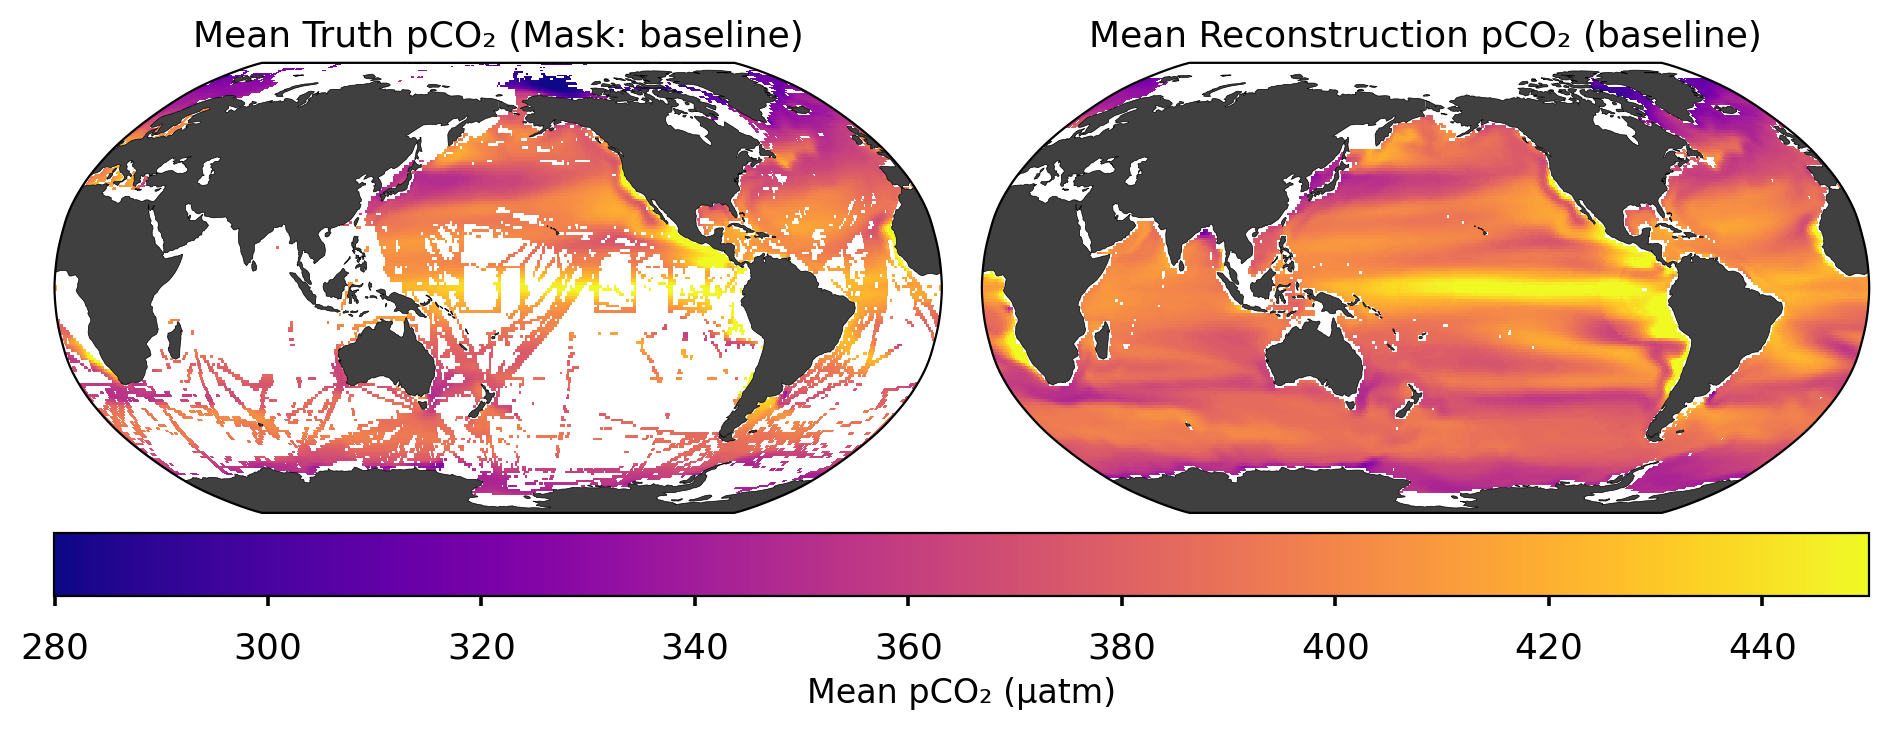

Plotting complete.


In [32]:
plot_reconstruction_vs_truth(
   mask_name="baseline",          # Choose the mask scenario
   mask_data_dict=mask_data_dict,
   selected_mems_dict=selected_mems_dict,
   ensemble_dir=ensemble_dir,
   output_dir=output_dir,
   dates=dates,
   init_date=init_date,
   fin_date=fin_date,
   vrange=[280,450],             # Optional: Adjust range
   cmap_data='plasma'            # Optional: Choose colormap
)

##### B. Average Standard Deviation of Pred Dists over timeseries

Loading STD from: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Generating plot...


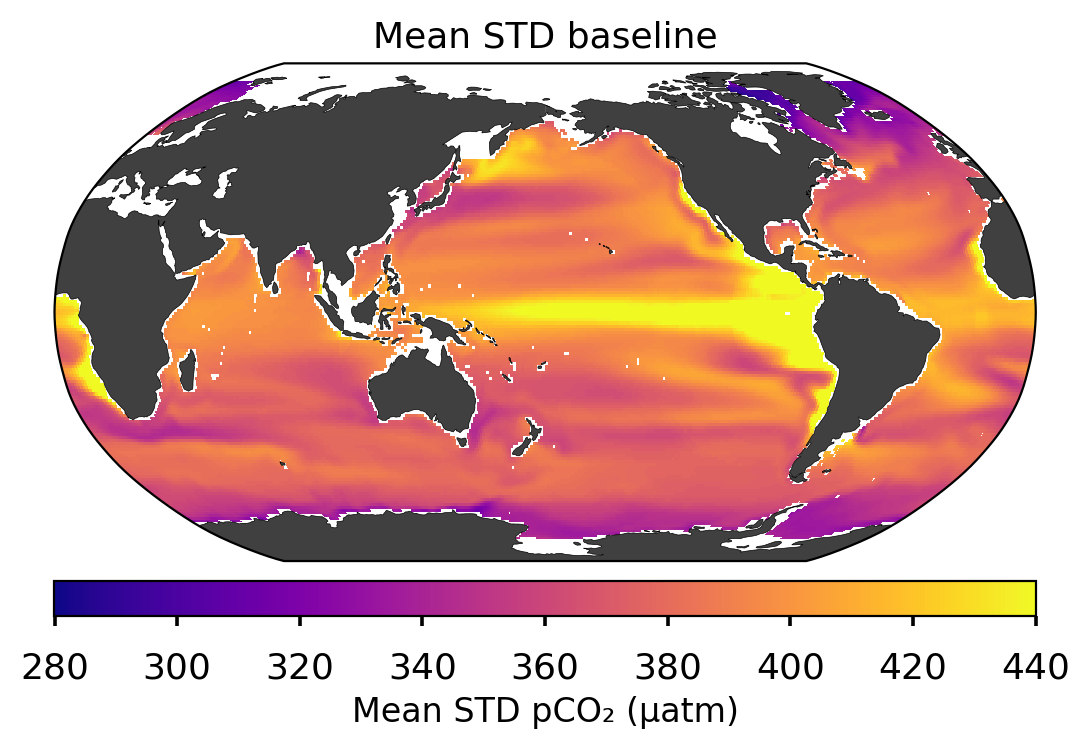

Plotting complete.


In [33]:
plot_reconstruction_std_single(
    mask_name="baseline",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    vrange=[280, 440],
    cmap_std="plasma",
)

# ADD P-VAL For baseline

## 3.2 Comparison of Baseline vs models trained on more data

### 3.2.1 Analyze data added to locations historically sampled

### THINK MAKES SENSE TO SHOW 3 GRAPHS FOR EACH SAMPLE: 1.CHANGE IN AVG pCO2; 2. CHANGE IN STD; 3. CHANGE P.VAL

##### A. 14% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


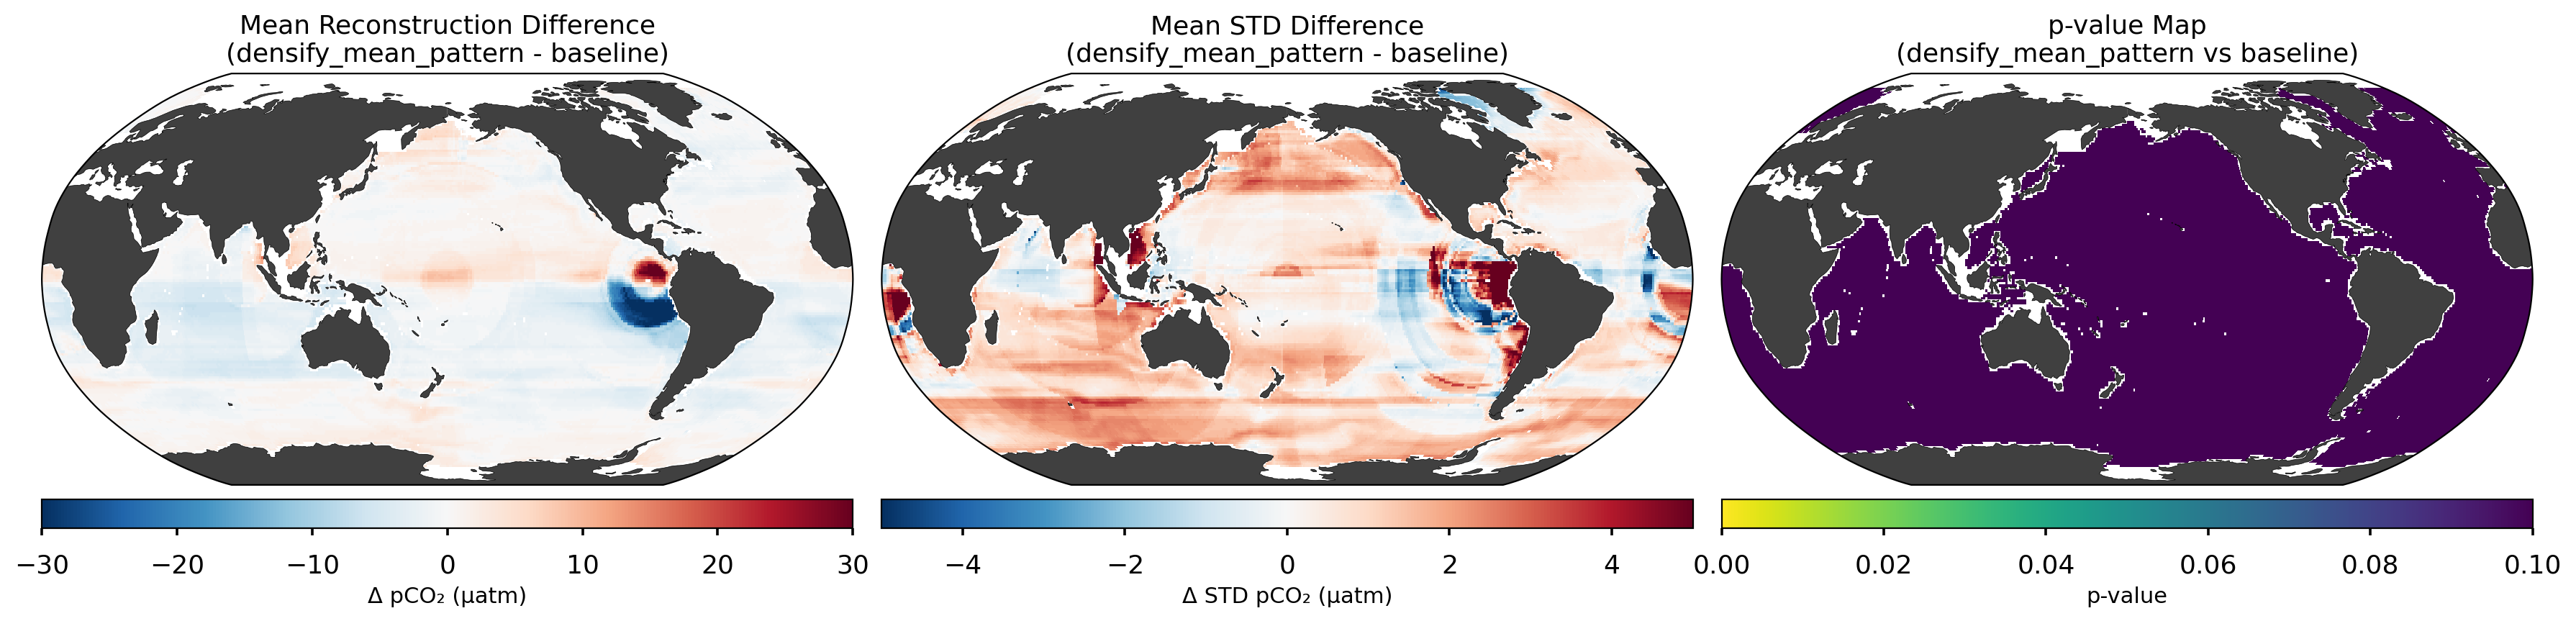

Plotting complete.


In [34]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_mean_pattern",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)


##### B. 30% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


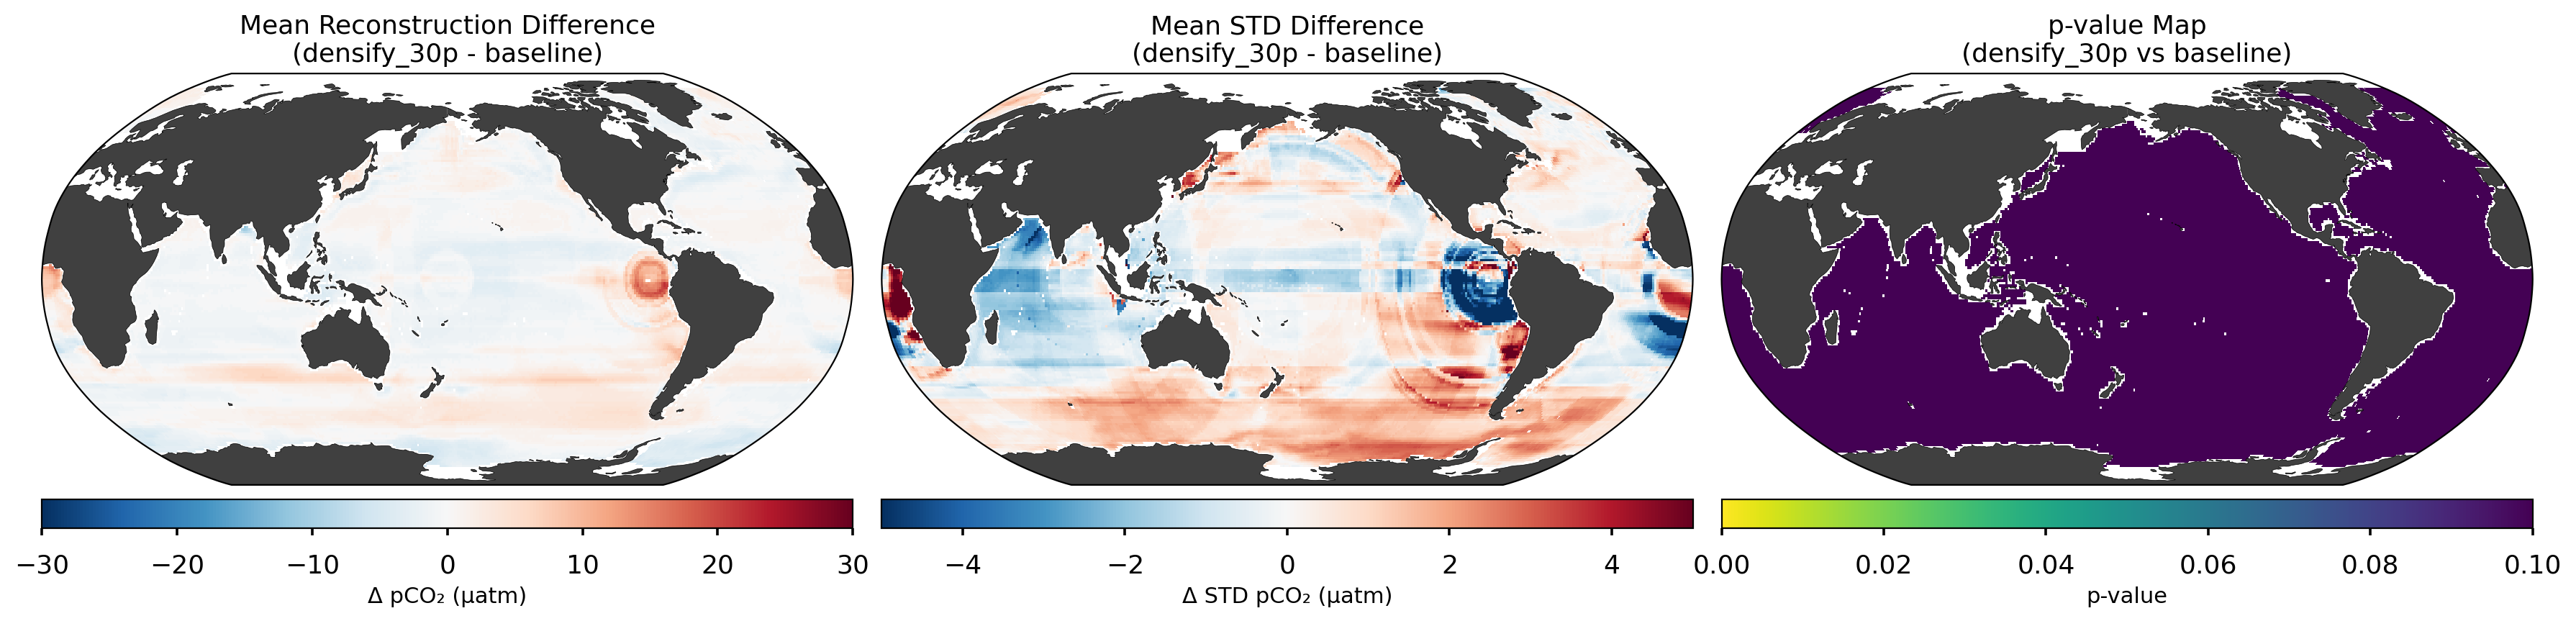

Plotting complete.


In [35]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_30p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)


##### B. 50% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


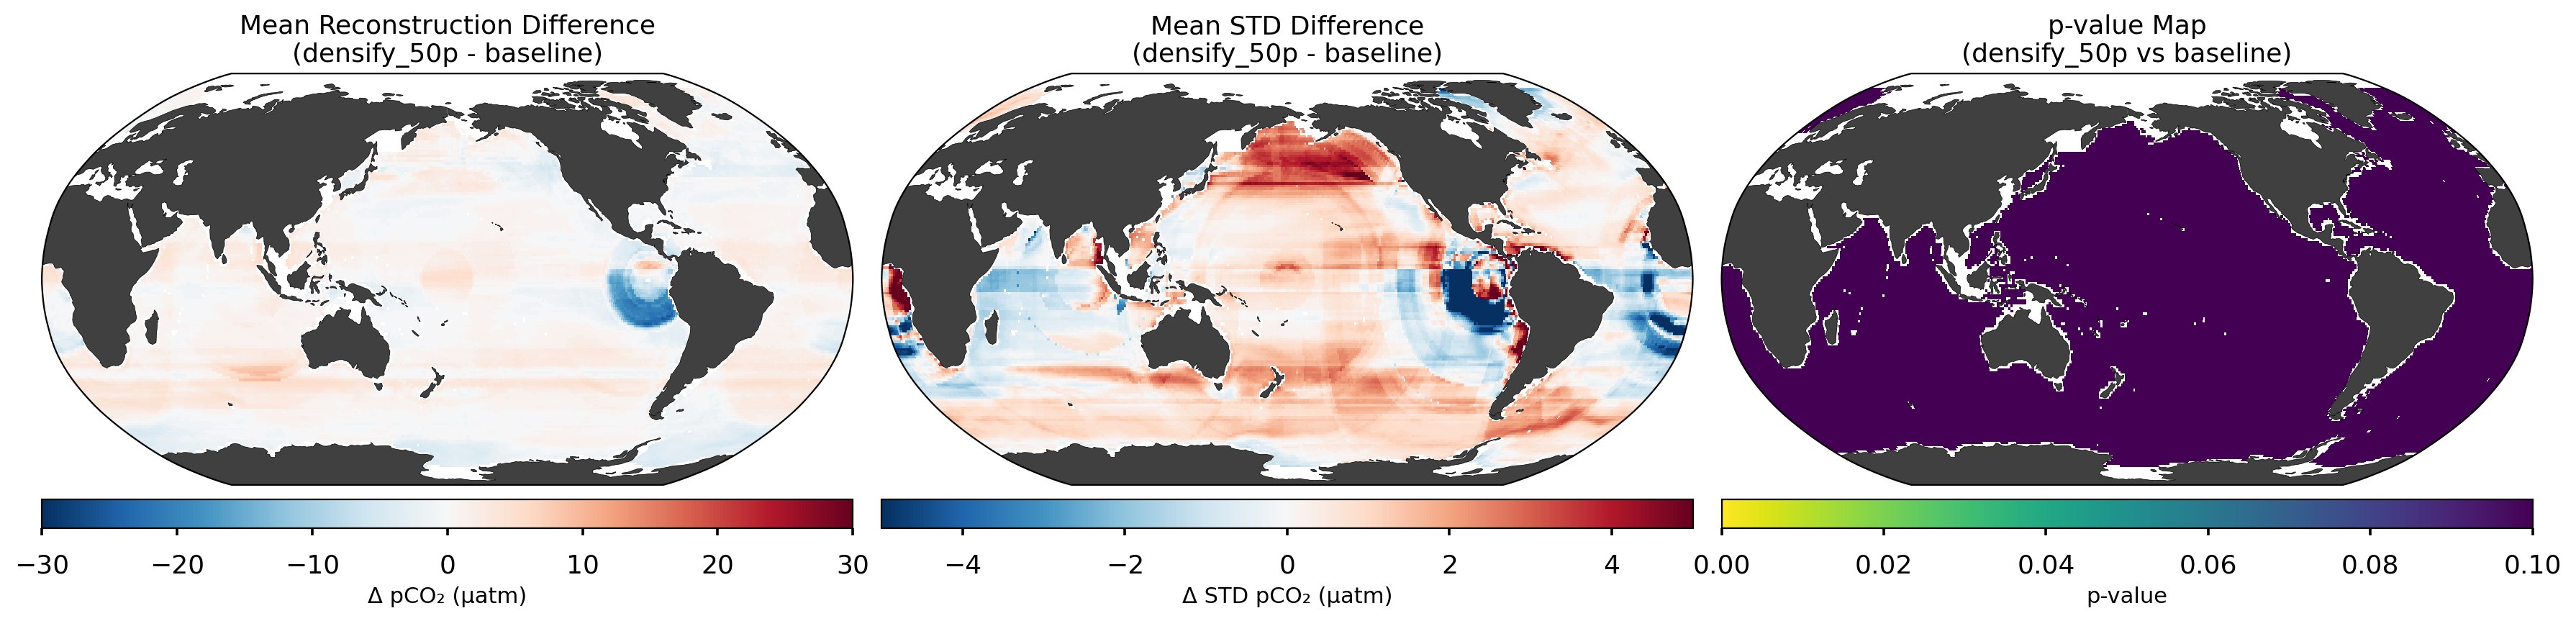

Plotting complete.


In [36]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_50p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

### 3.2.2 Analyze data added to new locations not historically sampled

##### A. 14% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


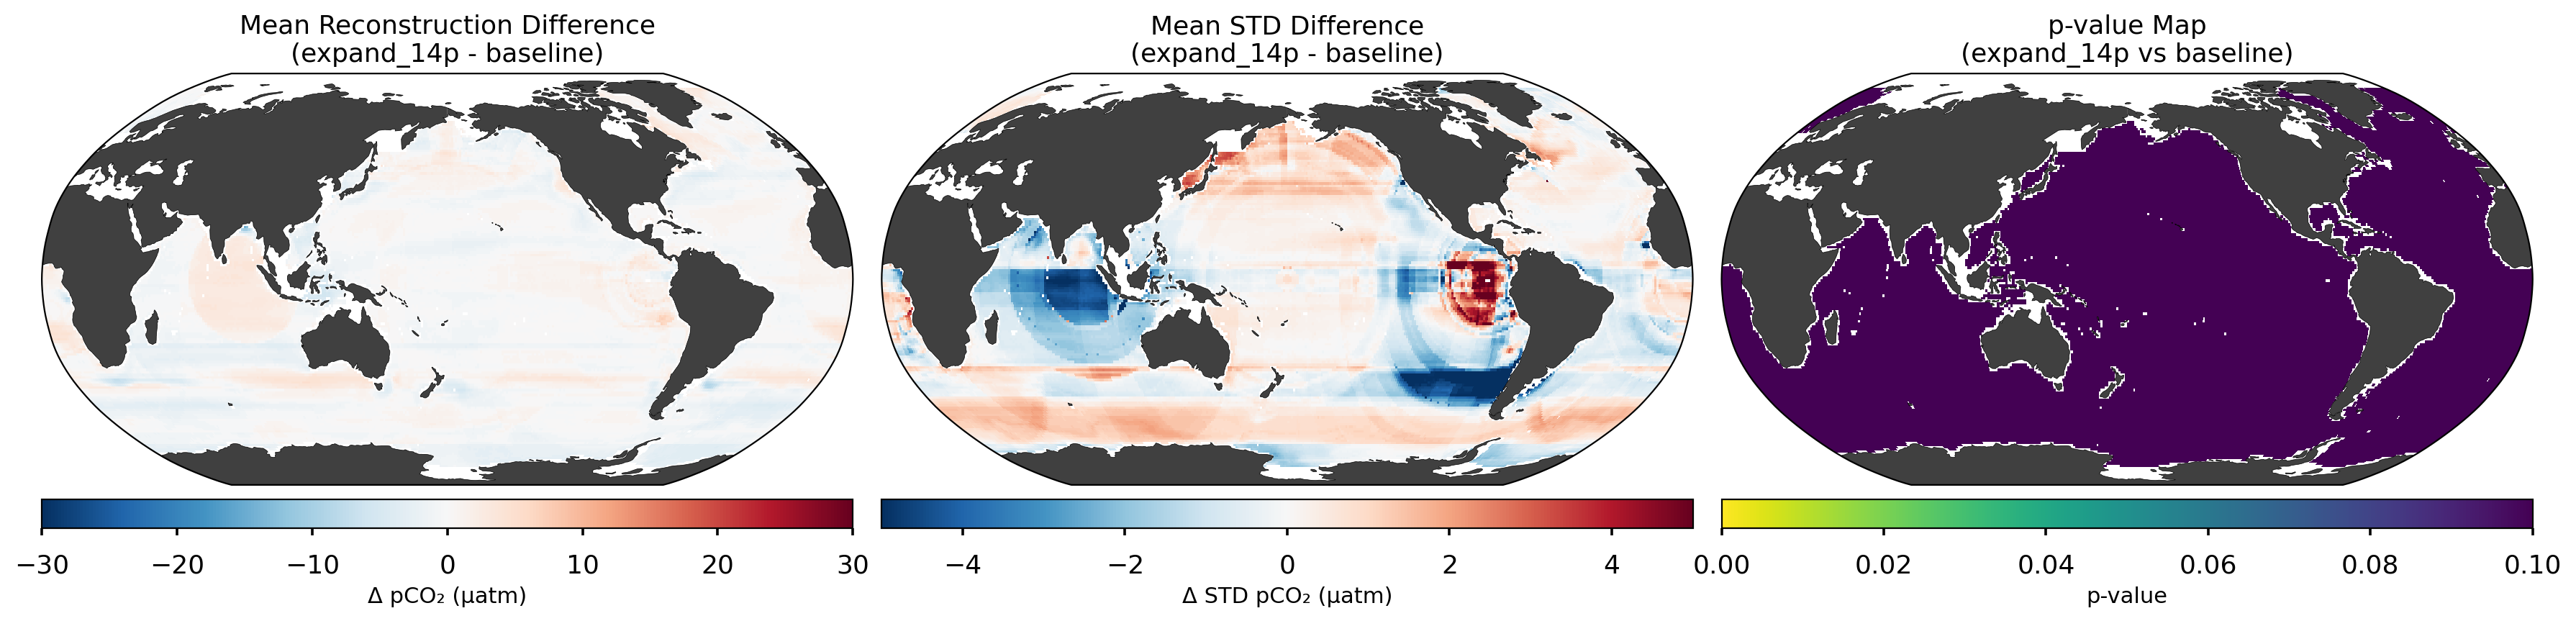

Plotting complete.


In [37]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_14p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

##### B. 30% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


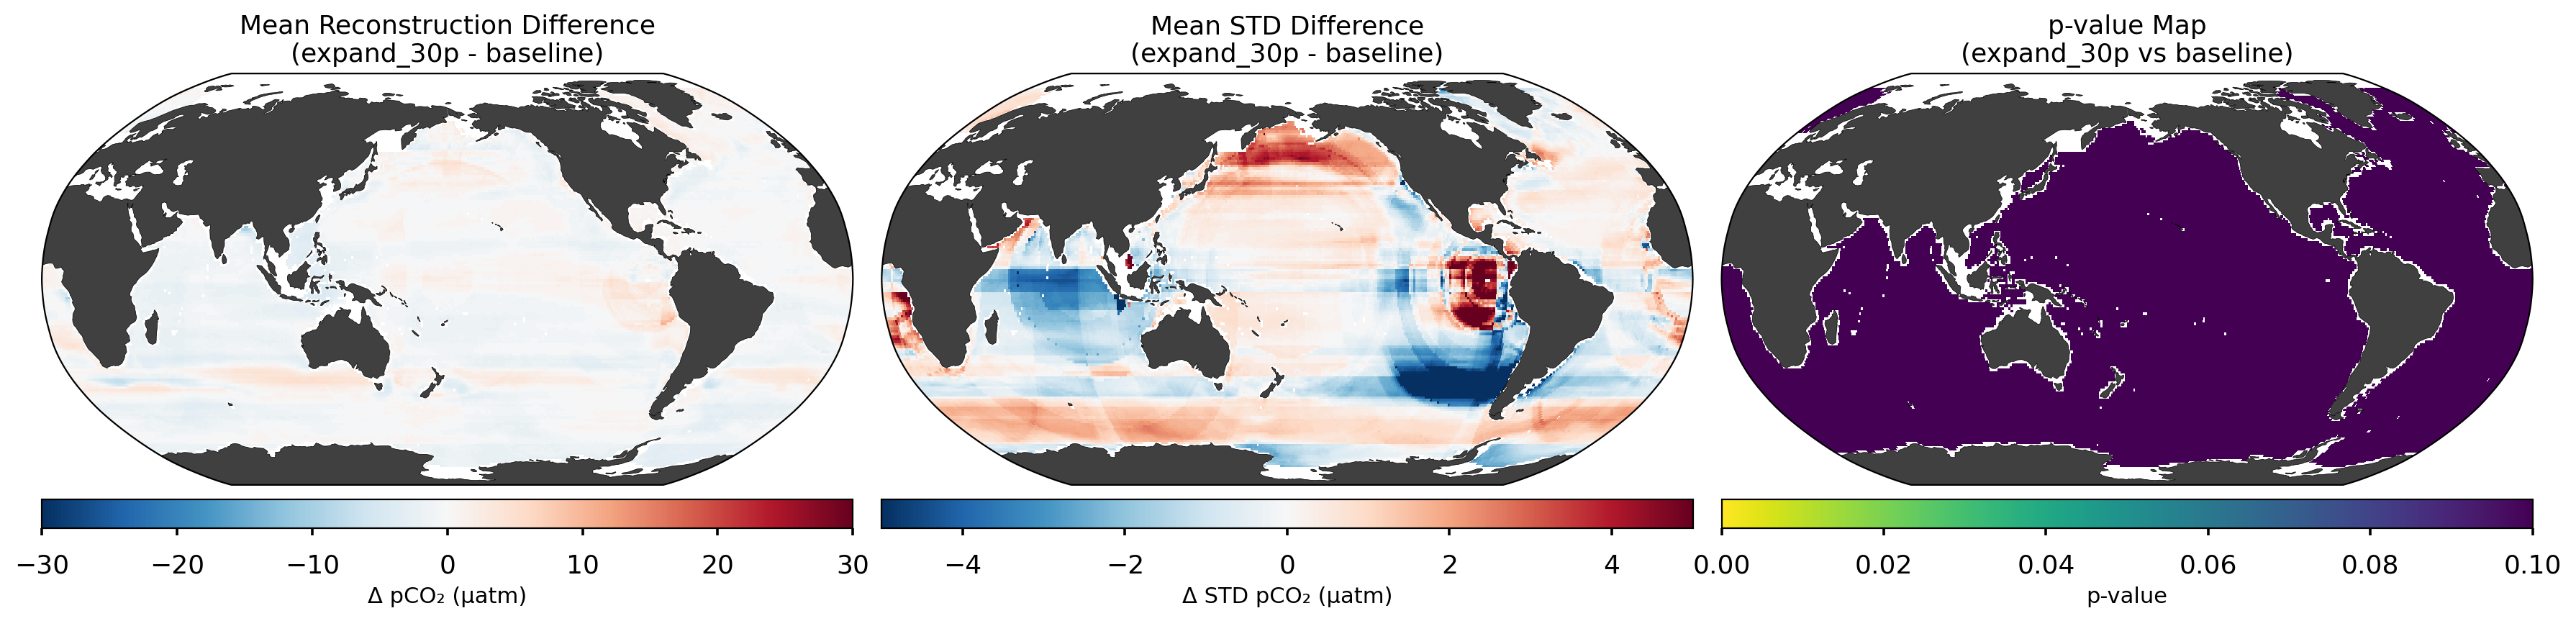

Plotting complete.


In [38]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_30p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

##### C. 50% increase

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682


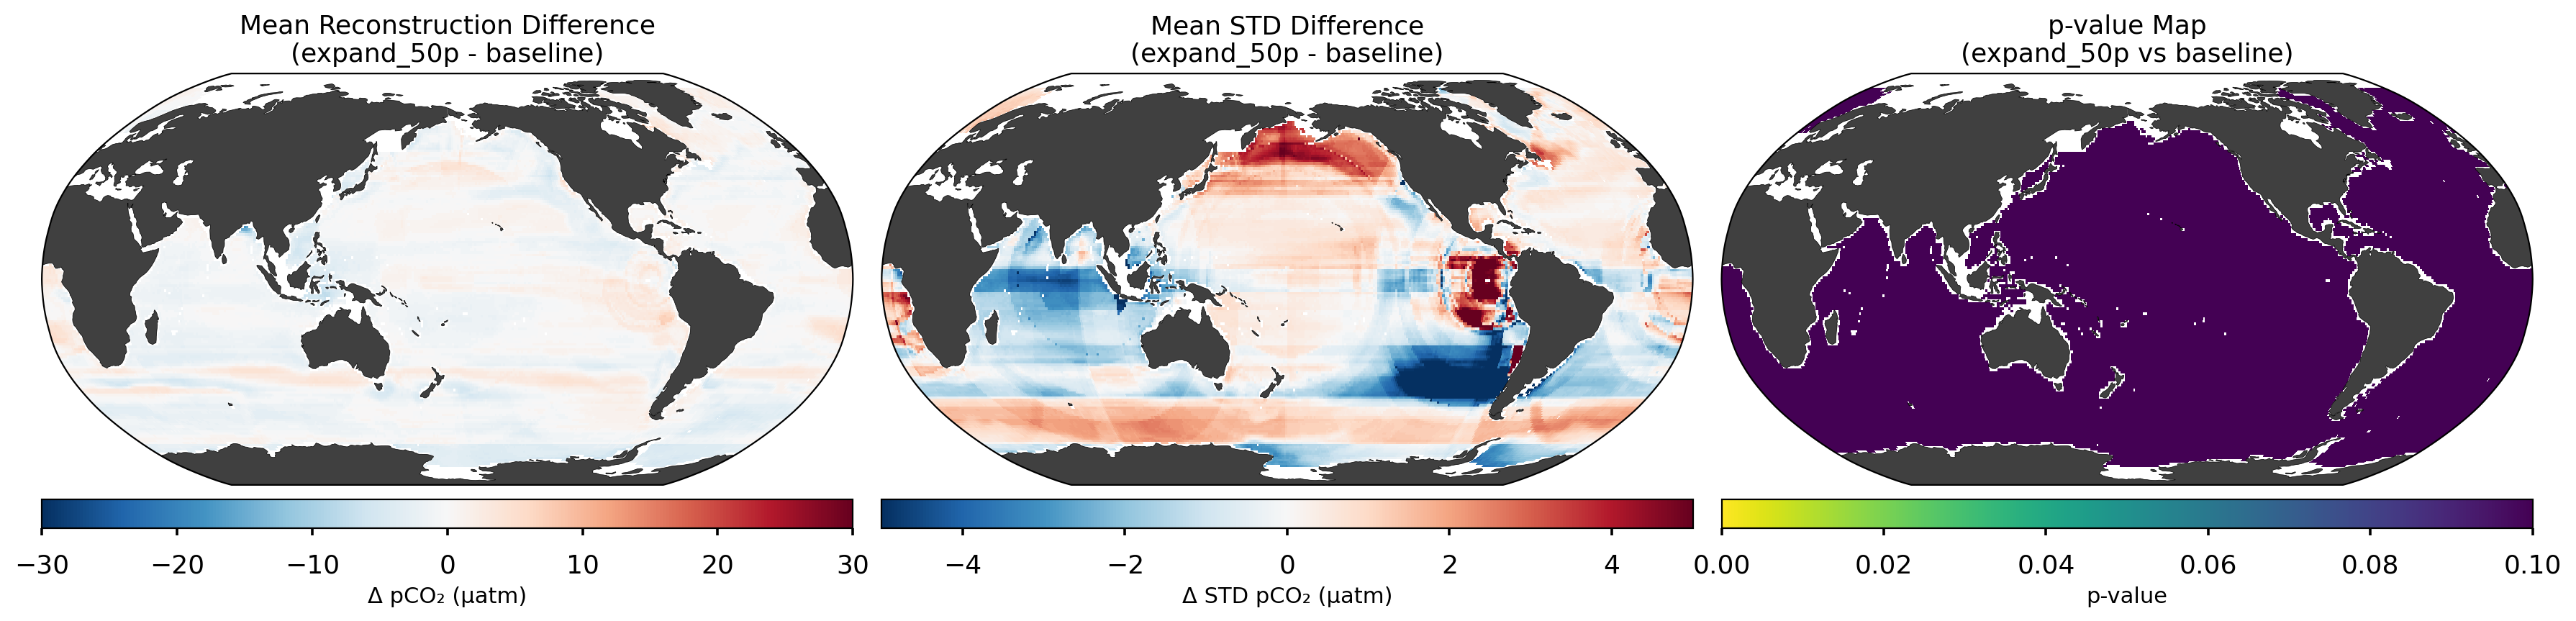

Plotting complete.


In [39]:
plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_50p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

# 4. Reproducibility - checking additional members

In [40]:
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap


Calculating p-values...

Creating visualization...


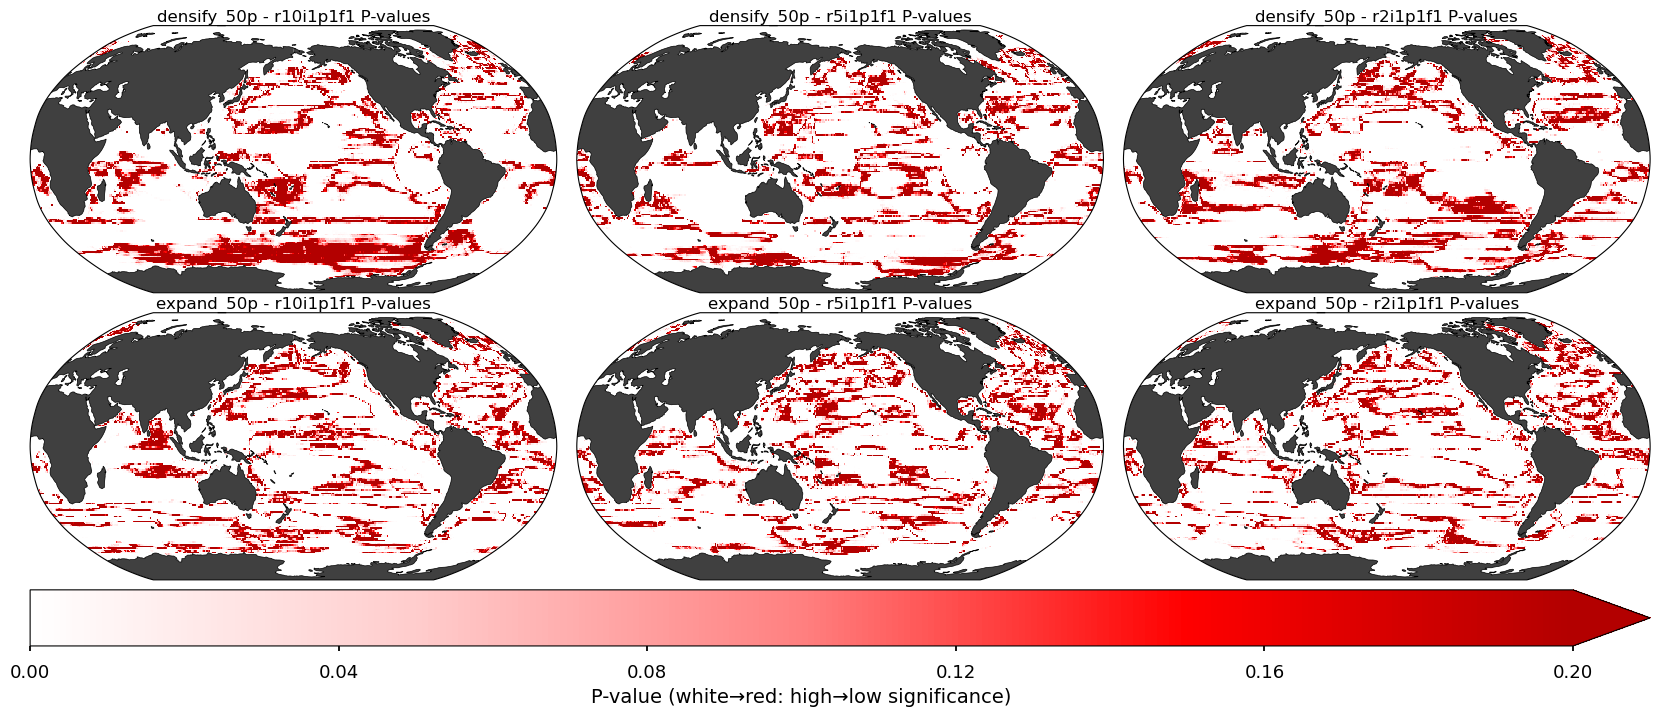


Calculating statistics...

Statistical Comparison:
Strategy        Member          Significant Area %   Mean P-value   
----------------------------------------------------------------------
densify_50p     r10i1p1f1                      71.79%          0.1204
densify_50p     r2i1p1f1                       73.87%          0.1092
densify_50p     r5i1p1f1                       77.17%          0.0952
expand_50p      r10i1p1f1                      77.74%          0.0914
expand_50p      r2i1p1f1                       78.96%          0.0847
expand_50p      r5i1p1f1                       77.44%          0.0931


In [41]:
# Settings
init_date = '200401'
fin_date = '202312'
sampling_strategies = ['densify_50p', 'expand_50p']
members = ['member_r10i1p1f1', 'member_r5i1p1f1', 'member_r2i1p1f1']
ens = 'ACCESS-ESM1-5'
base_dir = 'leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb'
RECON_VARS = {'baseline': 'pCO2_recon_full', 'densify_50p': 'pCO2_recon_full', 'expand_50p': 'pCO2_recon_full'}

# Initialize GCS file system
fs = gcsfs.GCSFileSystem()

# Recenter the map to the Pacific
def pacific_center(ds):
    ds_cyclic = xr_add_cyclic_point(ds, cyclic_coord='xlon')
    ds_cyclic = ds_cyclic.assign_coords(xlon=(((ds_cyclic.xlon + 180) % 360) - 180))
    ds_pacific = ds_cyclic.assign_coords(xlon=(ds_cyclic.xlon + 180) % 360)
    ds_pacific = ds_pacific.sortby('xlon')
    return ds_pacific

# Load reconstruction data
def load_reconstruction(strategy, member):
    recon_dir = f"{base_dir}/reconstructions/{strategy}/{ens}/{member}"
    possible_filenames = [f"recon_pCO2_{ens}_{member}_mon_1x1_{init_date}_{fin_date}.zarr", 
                          f"recon_pCO2residual_{ens}_{member}_mon_1x1_{init_date}_{fin_date}.zarr"]
    
    for filename in possible_filenames:
        try:
            recon_path = f"{recon_dir}/{filename}"
            full_path = f"gs://{recon_path}"
            
            if not fs.exists(full_path):
                continue
                
            ds = xr.open_zarr(full_path)
            
            known_pco2_vars = ['pCO2_recon_full', 'pCO2_recon_unseen', 'pCO2_truth']
            for var in known_pco2_vars:
                if var in ds.data_vars:
                    return ds[var]
            return ds
        except Exception:
            pass
    return None

# Calculate p-values
def calculate_model_vs_baseline_pvalue(model_data, baseline_data, dim='time'):
    if isinstance(model_data, xr.Dataset):
        for var in model_data.data_vars:
            if 'pco2' in var.lower() or 'recon' in var.lower():
                model_data = model_data[var]
                break
        else:
            model_data = model_data[list(model_data.data_vars)[0]]
    
    if isinstance(baseline_data, xr.Dataset):
        for var in baseline_data.data_vars:
            if 'pco2' in var.lower() or 'recon' in var.lower():
                baseline_data = baseline_data[var]
                break
        else:
            baseline_data = baseline_data[list(baseline_data.data_vars)[0]]
    
    n = len(model_data[dim])
    diff = (model_data - baseline_data).mean(dim=dim)
    diff_std = (model_data - baseline_data).std(dim=dim)
    diff_std = xr.where(diff_std == 0, np.nan, diff_std)
    t_stat = diff / (diff_std / np.sqrt(n))
    
    p_values = xr.apply_ufunc(
        lambda x: 2 * stats.t.sf(np.abs(x), df=n-1),
        t_stat,
        dask='parallelized',
        output_dtypes=[float]
    )
    
    return p_values

# Compute p-values for all strategy-member combinations
def calculate_strategy_pvalues(strategies, members):
    result = {}
    baseline_strategy = 'baseline'
    
    for strategy in strategies:
        result[strategy] = {}
        
        for member in members:
            baseline_ds = load_reconstruction(baseline_strategy, member)
            if baseline_ds is None:
                continue
                
            strategy_ds = load_reconstruction(strategy, member)
            if strategy_ds is None:
                continue
            
            p_values = calculate_model_vs_baseline_pvalue(strategy_ds, baseline_ds, dim='time')
            
            try:
                p_values_pacific = pacific_center(p_values)
                result[strategy][member] = p_values_pacific
            except Exception:
                result[strategy][member] = p_values
            
    return result

# Plotting function for comparing p-values
def create_pvalue_comparison_plot(pvalue_data, output_filename="strategy_pvalues_comparison.png"):
    plot_style = "seaborn-v0_8-talk"
    
    with plt.style.context(plot_style):
        fig = plt.figure(figsize=(18, 12))
        plt.subplots_adjust(hspace=5, wspace=0.2, top=0.9, bottom=0.15)  
        
        worldmap = SpatialMap2(fig=fig, region='world', 
                           cbar_mode='single',
                           colorbar=True,
                           cbar_location='bottom',
                           nrows_ncols=[2, 3])
        
        white_to_red = LinearSegmentedColormap.from_list(
            'white_to_red', [(1, 1, 1), (1, 0.8, 0.8), (1, 0.5, 0.5), (1, 0, 0), (0.7, 0, 0)], N=256)
        
        for i, strategy in enumerate(pvalue_data.keys()):
            for j, member in enumerate(pvalue_data[strategy].keys()):
                data = pvalue_data[strategy][member]
                plot_idx = i * 3 + j
                
                sub = worldmap.add_plot(
                    lon=data['xlon'], lat=data['ylat'], data=data,
                    vrange=[0, 0.2], cmap=white_to_red, ax=plot_idx, linewidth_coast=0.5
                )
                
                member_id = member.split('_')[-1]
                worldmap.set_title(f"{strategy} - {member_id} P-values", ax=plot_idx, fontsize=12, pad=3)
        
        col = worldmap.add_colorbar(sub, ax=0, extend='max')
        worldmap.set_cbar_xlabel(col, 'P-value (white→red: high→low significance)', fontsize=14)
        worldmap.set_ticks(col, 0, 0.2, 0.04)
        
        plt.subplots_adjust(hspace=0.6, wspace=0.3, top=0.92, bottom=0.12, left=0.05, right=0.95)
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        plt.show()

# Print statistical summary
def print_stats(pvalue_data):
    sig_threshold = 0.05
    stats_df = pd.DataFrame({
        'Strategy': pd.Series(dtype='str'),
        'Member': pd.Series(dtype='str'),
        'Significant Area %': pd.Series(dtype='float'),
        'Mean P-value': pd.Series(dtype='float')
    })
    
    for strategy in pvalue_data.keys():
        for member in pvalue_data[strategy].keys():
            data = pvalue_data[strategy][member]
            ocean_mask = ~np.isnan(data)
            mean_pval = float(data.where(ocean_mask).mean().values)
            
            total_ocean_cells = np.sum(ocean_mask)
            sig_cells = np.sum((data.values <= sig_threshold) & ocean_mask.values)
            sig_percentage = (sig_cells / total_ocean_cells) * 100
            
            member_id = member.split('_')[-1]
            new_row = pd.DataFrame([{
                'Strategy': strategy,
                'Member': member_id,
                'Significant Area %': sig_percentage,
                'Mean P-value': mean_pval
            }])
            stats_df = pd.concat([stats_df, new_row], ignore_index=True)

    stats_df = stats_df.sort_values(['Strategy', 'Member'])
    
    print("\nStatistical Comparison:")
    print("=" * 70)
    print(f"{'Strategy':<15} {'Member':<15} {'Significant Area %':<20} {'Mean P-value':<15}")
    print("-" * 70)
    
    for _, row in stats_df.iterrows():
        print(f"{row['Strategy']:<15} {row['Member']:<15} {row['Significant Area %']:20.2f}% {row['Mean P-value']:15.4f}")
    
    print("=" * 70)
    
    return stats_df

# Main execution block
if __name__ == "__main__":
    print("\nCalculating p-values...")
    pvalue_data = calculate_strategy_pvalues(sampling_strategies, members)
    
    print("\nCreating visualization...")
    create_pvalue_comparison_plot(pvalue_data, "pCO2_reconstruction_pvalues.png")
    
    print("\nCalculating statistics...")
    stats_df = print_stats(pvalue_data)
    
    stats_df.to_csv("pCO2_reconstruction_statistics.csv", index=False)


# 5. Seasonality (tbd if needed)

Loading full time series data for reconstructions...
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/expand_14p/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Selected first member (if applicable) for both reconstructions.
Calculating seasonal means for reconstructions...
Seasonal means calculated.
Aligning longitude for difference map...
Longitude coordinates ('xlon') adjusted to -180 to 180.
Generating 1x4 seasonal difference plots...
  Plotting difference for season: DJF on axis index 0
  Plotting difference for season: MAM on axis index 1
  Plotting difference for season: JJA on axis index 2
  Plotting difference for season: SON on axis index 3
Using subplots_adjust f

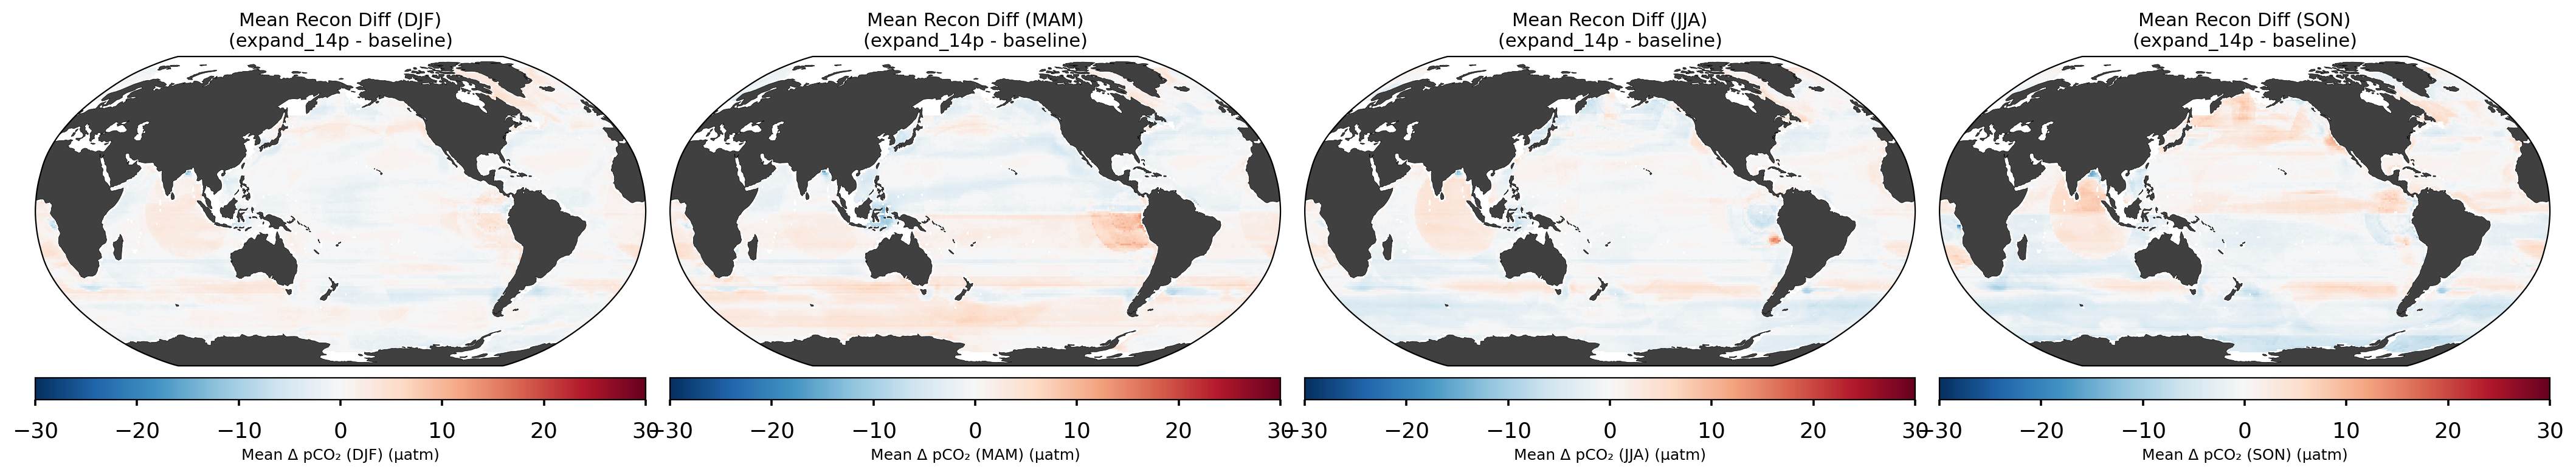

Plotting complete.


In [42]:
plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="expand_14p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

Loading full time series data for reconstructions...
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/expand_30p/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Selected first member (if applicable) for both reconstructions.
Calculating seasonal means for reconstructions...
Seasonal means calculated.
Aligning longitude for difference map...
Longitude coordinates ('xlon') adjusted to -180 to 180.
Generating 1x4 seasonal difference plots...
  Plotting difference for season: DJF on axis index 0
  Plotting difference for season: MAM on axis index 1
  Plotting difference for season: JJA on axis index 2
  Plotting difference for season: SON on axis index 3
Using subplots_adjust f

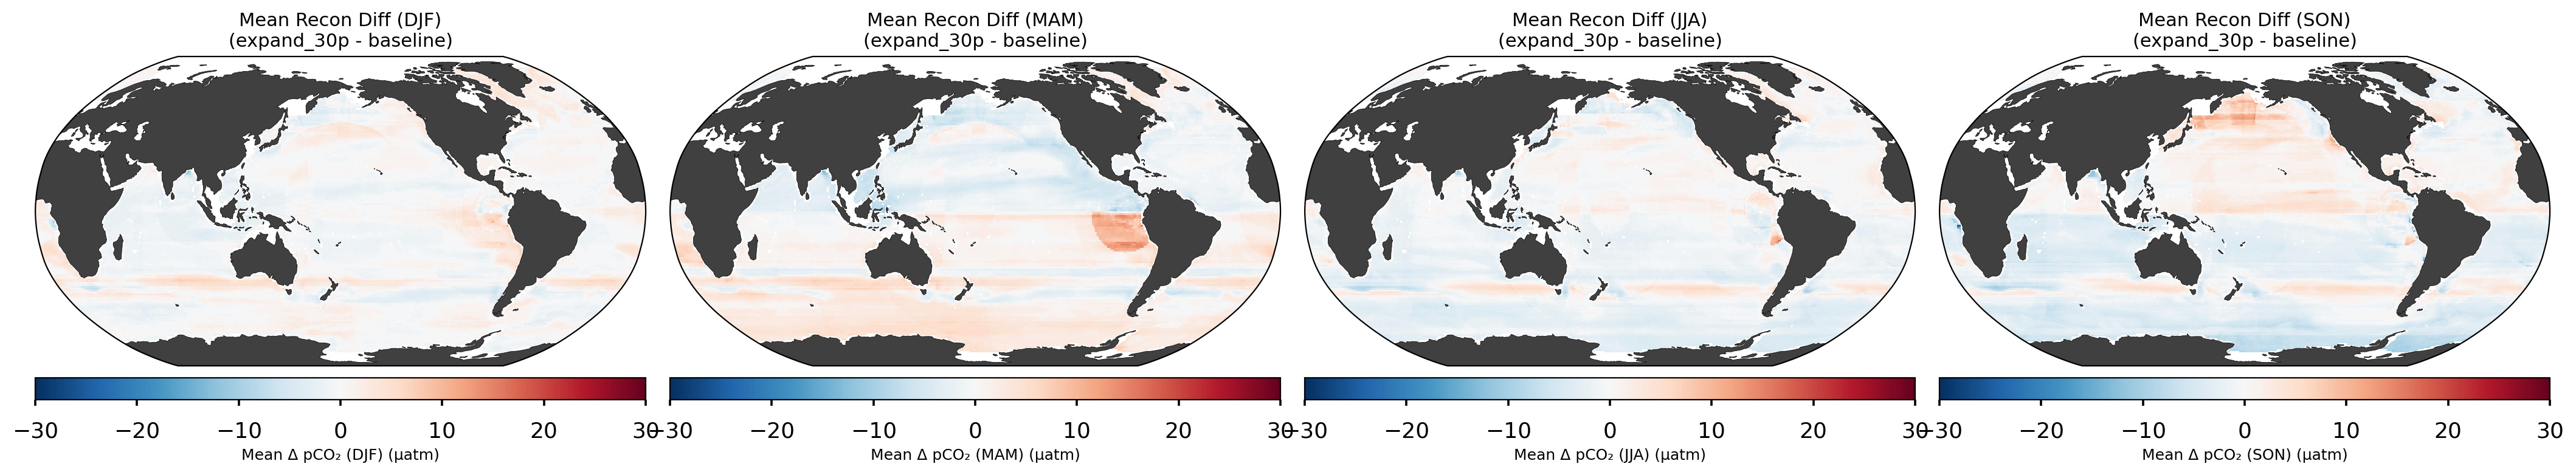

Plotting complete.


In [43]:
plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="expand_30p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

Loading full time series data for reconstructions...
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/expand_50p/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Selected first member (if applicable) for both reconstructions.
Calculating seasonal means for reconstructions...
Seasonal means calculated.
Aligning longitude for difference map...
Longitude coordinates ('xlon') adjusted to -180 to 180.
Generating 1x4 seasonal difference plots...
  Plotting difference for season: DJF on axis index 0
  Plotting difference for season: MAM on axis index 1
  Plotting difference for season: JJA on axis index 2
  Plotting difference for season: SON on axis index 3
Using subplots_adjust f

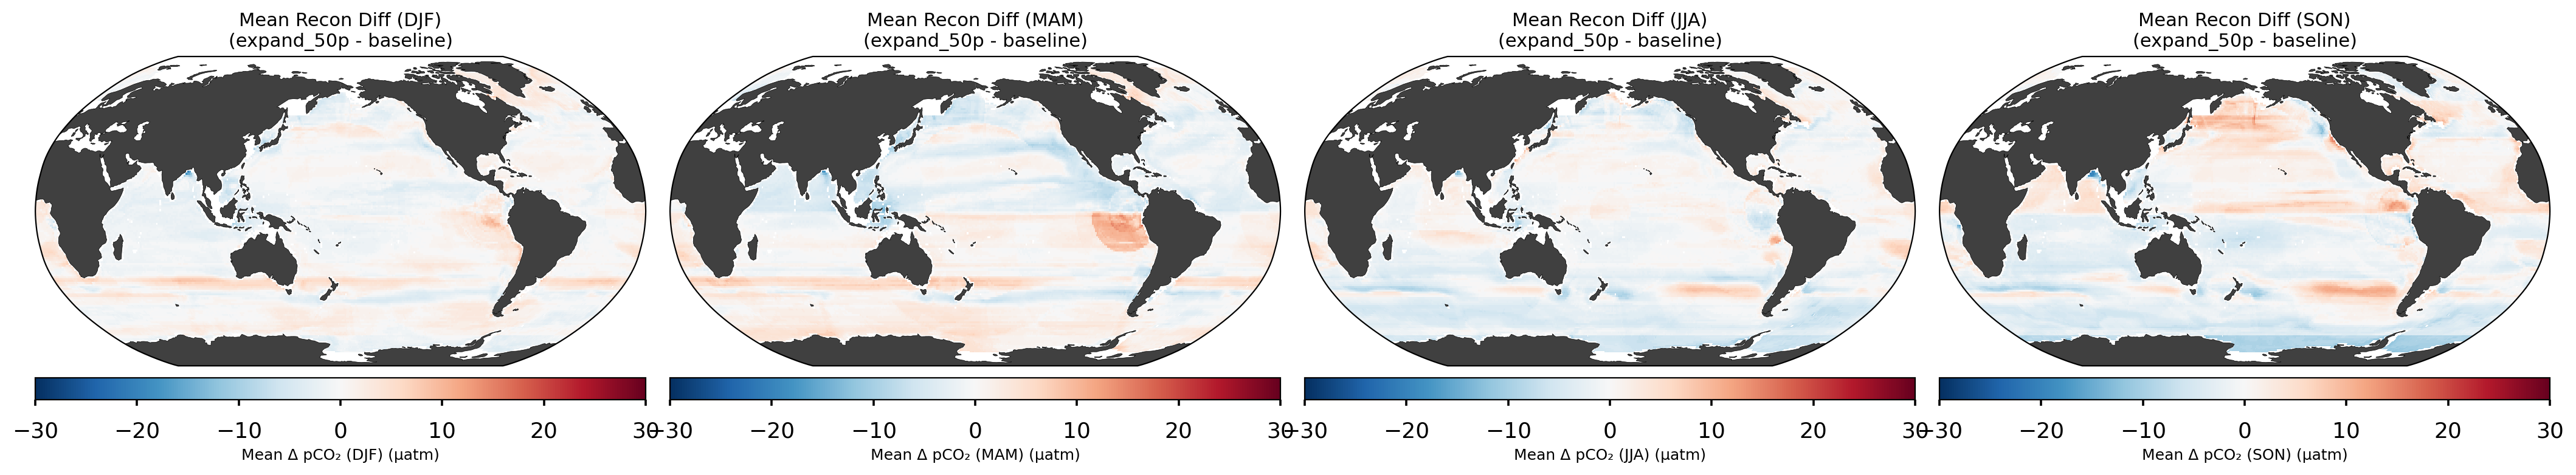

Plotting complete.


In [44]:
plot_seasonal_difference_panel_1x4(
   mask_name_1="baseline",
   mask_name_2="expand_50p",
   selected_mems_dict=selected_mems_dict,
   ensemble_dir=ensemble_dir,
   output_dir=output_dir,
   init_date=init_date,
   fin_date=fin_date,
   diff_vrange=[-30, 30],
   cmap_diff="RdBu_r",
)

Loading full time series data for reconstructions...
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/densify_30p/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Selected first member (if applicable) for both reconstructions.
Calculating seasonal means for reconstructions...
Seasonal means calculated.
Aligning longitude for difference map...
Longitude coordinates ('xlon') adjusted to -180 to 180.
Generating 1x4 seasonal difference plots...
  Plotting difference for season: DJF on axis index 0
  Plotting difference for season: MAM on axis index 1
  Plotting difference for season: JJA on axis index 2
  Plotting difference for season: SON on axis index 3
Using subplots_adjust 

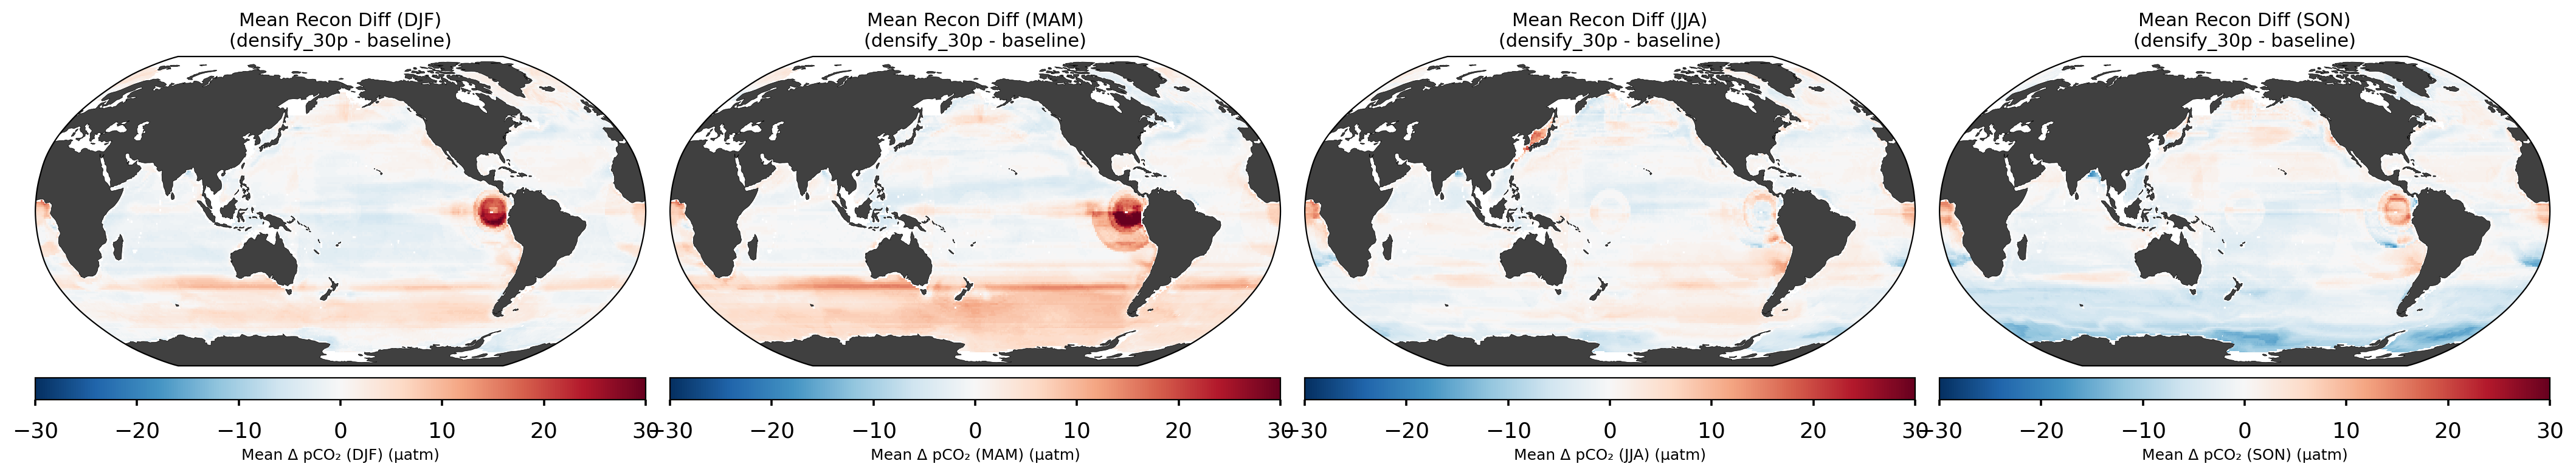

Plotting complete.


In [45]:
plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="densify_30p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

Loading full time series data for reconstructions...
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Loading Zarr: gs://leap-persistent/azamkhan99/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/densify_50p/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Selected first member (if applicable) for both reconstructions.
Calculating seasonal means for reconstructions...
Seasonal means calculated.
Aligning longitude for difference map...
Longitude coordinates ('xlon') adjusted to -180 to 180.
Generating 1x4 seasonal difference plots...
  Plotting difference for season: DJF on axis index 0
  Plotting difference for season: MAM on axis index 1
  Plotting difference for season: JJA on axis index 2
  Plotting difference for season: SON on axis index 3
Using subplots_adjust 

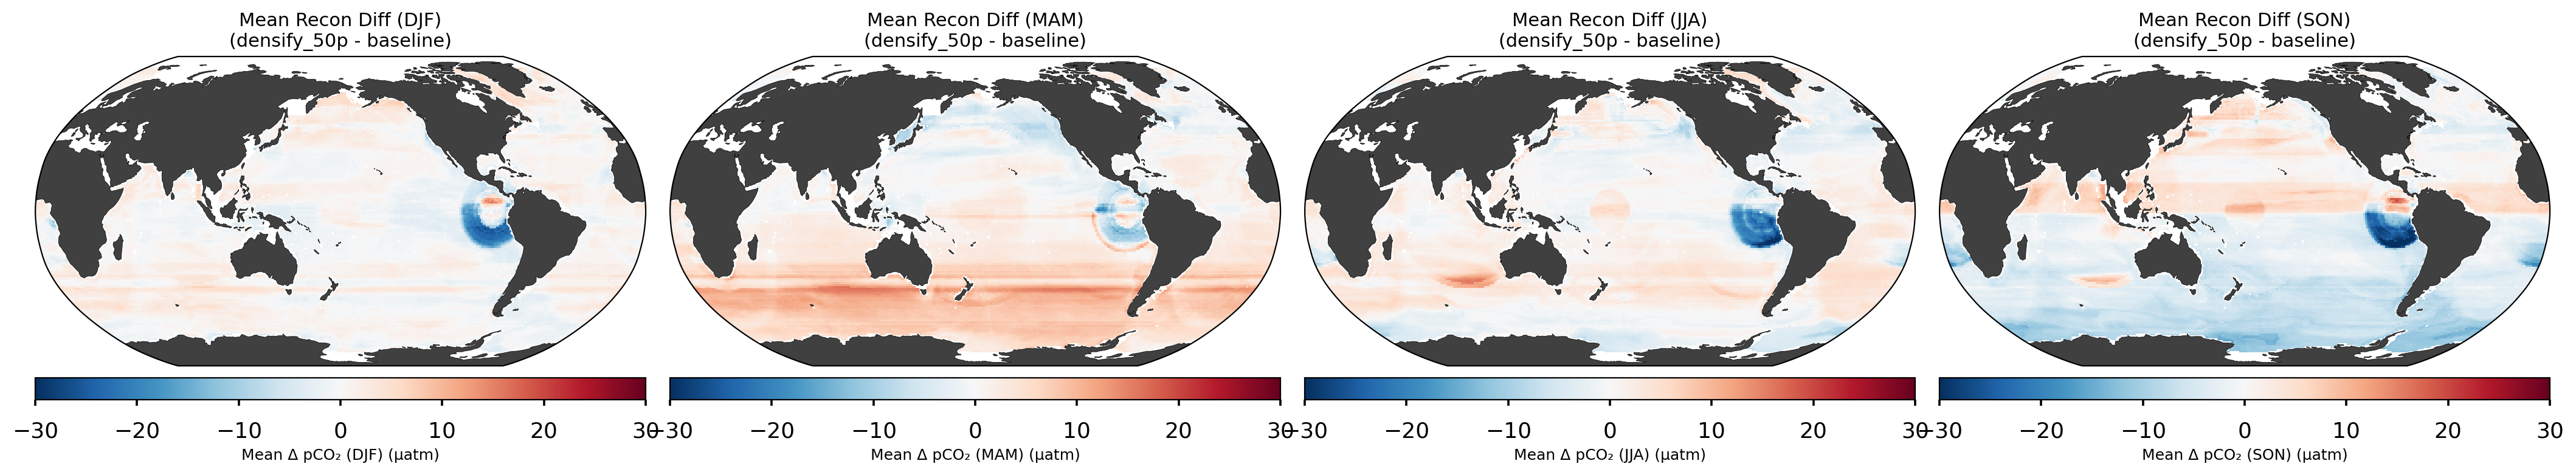

Plotting complete.


In [46]:
plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="densify_50p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

# 6. Conclusions